<a href="https://colab.research.google.com/github/krishnareddyalavala/Data-Science-models/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/california_housing_data.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.loc[df.duplicated()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
avgRooms = df['total_rooms'] / df['households']
avgBedRooms = df['total_bedrooms'] / df['households']
avgHousehold = df['population'] / df['households']

df.insert(4, 'avgRooms', avgRooms)
df.insert(5, 'avgBedRooms', avgBedRooms)
df.insert(6, 'avgHousehold', avgHousehold)

df.drop(['total_rooms','total_bedrooms','households'], axis=1, inplace=True)

# in millions
df['median_house_value'] = df['median_house_value']/1000000.0

df.head(100)

,longitude,latitude,housing_median_age,avgRooms,avgBedRooms,avgHousehold,population,median_income,median_house_value
0,-122.23,37.88,41.0,6.984127,1.023810,2.555556,322.0,8.3252,0.4526
1,-122.22,37.86,21.0,6.238137,0.971880,2.109842,2401.0,8.3014,0.3585
2,-122.24,37.85,52.0,8.288136,1.073446,2.802260,496.0,7.2574,0.3521
3,-122.25,37.85,52.0,5.817352,1.073059,2.547945,558.0,5.6431,0.3413
4,-122.25,37.85,52.0,6.281853,1.081081,2.181467,565.0,3.8462,0.3422
...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,2.294016,1.066294,1.493328,3469.0,2.0096,0.1300
96,-122.26,37.82,31.0,3.894915,1.127966,1.735593,2048.0,2.8345,0.1838
97,-122.26,37.81,29.0,3.681319,1.175824,2.219780,202.0,2.0062,0.1250
98,-122.26,37.82,22.0,2.945600,1.016000,1.619200,2024.0,1.2185,0.1700


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'avgRooms'}>,
        <Axes: title={'center': 'avgBedRooms'}>,
        <Axes: title={'center': 'avgHousehold'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

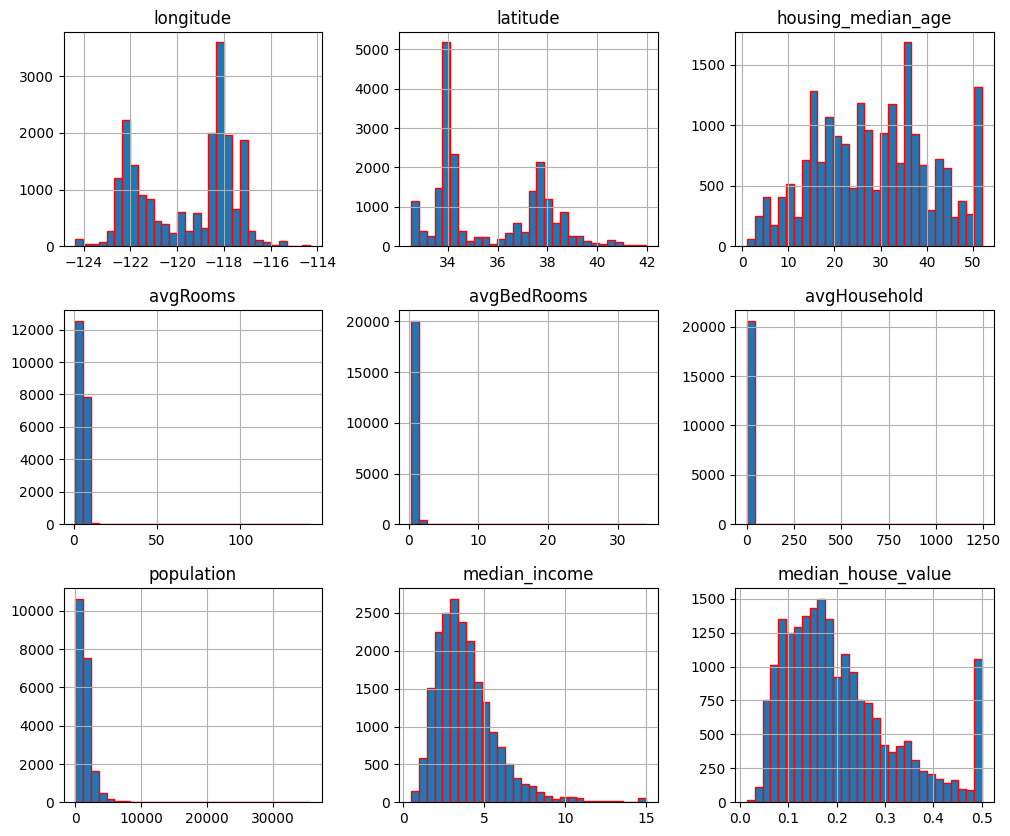

In [ ]:
df.hist(figsize=(12,10), bins=30, edgecolor="red")

In [ ]:
features_of_interest = ["avgRooms", "avgBedRooms", "avgHousehold", "population"]
df[features_of_interest].describe()

,avgRooms,avgBedRooms,avgHousehold,population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


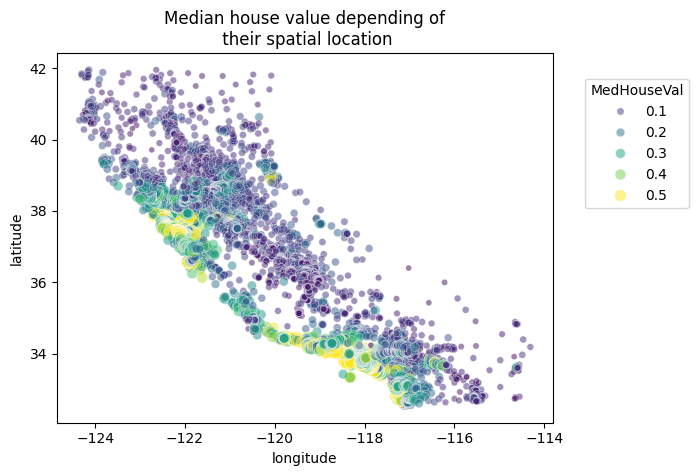

In [ ]:
sns.scatterplot(data=df,
                x='longitude',
                y='latitude',
                size='median_house_value',
                hue='median_house_value',
                palette='viridis',
                alpha=0.5
                )
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [ ]:
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(df.shape[0]), size=500, replace=False
)

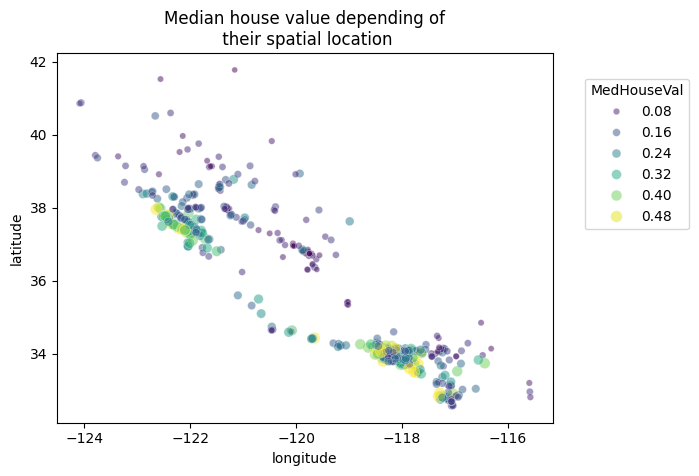

In [ ]:

sns.scatterplot(data=df.iloc[indices],
                x='longitude',
                y='latitude',
                size='median_house_value',
                hue='median_house_value',
                palette='viridis',
                alpha=0.5
                )
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
features = ['longitude', 'latitude', 'housing_median_age', 'avgRooms', 'avgBedRooms', 'avgHousehold','population','median_income']
X = df[features]
y = df['median_house_value']

In [ ]:
X.head()

,longitude,latitude,housing_median_age,avgRooms,avgBedRooms,avgHousehold,population,median_income
0,-122.23,37.88,41.0,6.984127,1.023810,2.555556,322.0,8.3252
1,-122.22,37.86,21.0,6.238137,0.971880,2.109842,2401.0,8.3014
2,-122.24,37.85,52.0,8.288136,1.073446,2.802260,496.0,7.2574
3,-122.25,37.85,52.0,5.817352,1.073059,2.547945,558.0,5.6431
4,-122.25,37.85,52.0,6.281853,1.081081,2.181467,565.0,3.8462


In [ ]:
y.head()

,median_house_value
0,0.4526
1,0.3585
2,0.3521
3,0.3413
4,0.3422


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005558915986952441
